<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº4
#### Alumnos: Augusto Colugnatti y Mateo Murgia
#### Profesor/es: Mariano Llamedo Soria , David Benoit, Hernan Ledesma


# Introducción

El análisis espectral de señales en el dominio discreto se realiza a través de la **Transformada Discreta de Fourier (DFT)**, herramienta fundamental en el procesamiento digital de señales ya que permite obtener la distribución en frecuencia de una señal finita.  
La DFT de una señal \(x[n]\) de longitud \(N\) se define como:  

$$
X[k] = \sum_{n=0}^{N-1} x[n] \, e^{-j \frac{2\pi}{N}kn}, \quad k = 0, 1, \dots, N-1
$$

y su transformada inversa permite reconstruir la señal original a partir de sus componentes frecuenciales:

$$
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \, e^{j \frac{2\pi}{N}kn}
$$

La **resolución en frecuencia** de la DFT depende de la frecuencia de muestreo \(f_s\) y del tamaño de la transformada \(N\):  

$$
\Delta f = \frac{f_s}{N}
$$

Cuando una señal sinusoidal de frecuencia \(f_0\) no coincide exactamente con un múltiplo entero de \(\Delta f\), es decir:  

$$
f_0 = \left( k_0 + \delta \right) \Delta f , \quad \delta \neq 0
$$

se produce el fenómeno de **desparramo espectral** (*spectral leakage*). En este caso, la energía que debería concentrarse en un único bin frecuencial se distribuye en frecuencias adyacentes. Esto se refleja en la **densidad espectral de potencia (PSD)**:  

$$
P[k] = \frac{1}{N} |X[k]|^2
$$

El análisis energético se fundamenta en la **identidad de Parseval**, que garantiza la equivalencia entre la energía en el dominio temporal y en el frecuencial:  

$$
\sum_{n=0}^{N-1} |x[n]|^2 \;=\; \frac{1}{N} \sum_{k=0}^{N-1} |X[k]|^2
$$

Para mejorar la visualización del espectro se utiliza la técnica de **zero padding**, que consiste en extender la señal original con ceros antes de calcular la DFT. De esta forma, el número de puntos de la transformada aumenta y la resolución frecuencial se refina:  

$$
N' = N + N_{\text{zeros}} \quad \Rightarrow \quad \Delta f' = \frac{f_s}{N'} < \Delta f
$$

Si bien este procedimiento no añade información nueva, permite interpolar el espectro y representar con mayor detalle las frecuencias presentes.  

Finalmente, el empleo de **funciones ventana** (rectangular, Hamming, Hanning, Blackman, entre otras) busca mitigar los efectos del truncamiento de la señal en el tiempo. Al multiplicar la señal original por una ventana \(w[n]\):  

$$
x_w[n] = x[n] \cdot w[n]
$$

se obtiene un espectro modificado: el ventaneo reduce los lóbulos laterales en el dominio frecuencial, aunque a costa de ensanchar el lóbulo principal, lo que implica un compromiso entre resolución y supresión de artefactos.  

En este trabajo se estudiará el **desparramo espectral** a partir de señales senoidales con frecuencias cercanas a múltiplos de $$ \Delta f $$. Se graficarán sus densidades espectrales de potencia, se verificará la **identidad de Parseval** y se analizarán los efectos del **zero padding** y el **ventaneo** sobre la representación espectral discreta.  


# Desarrollo experimental


# Fig. 1 
En esta imagen armé en orden todos los gráficos necesarios para resolver los ejercicios propuestos


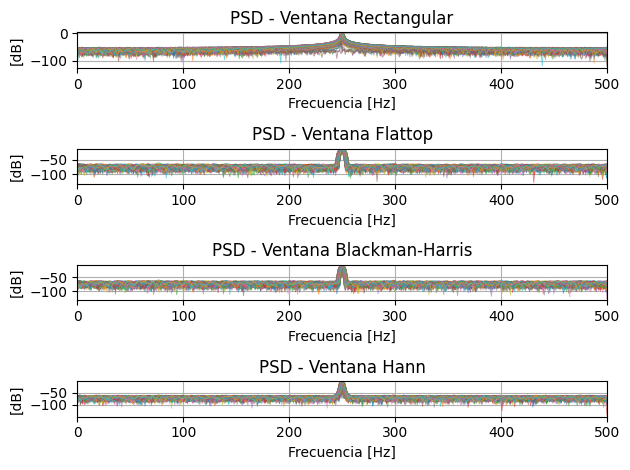

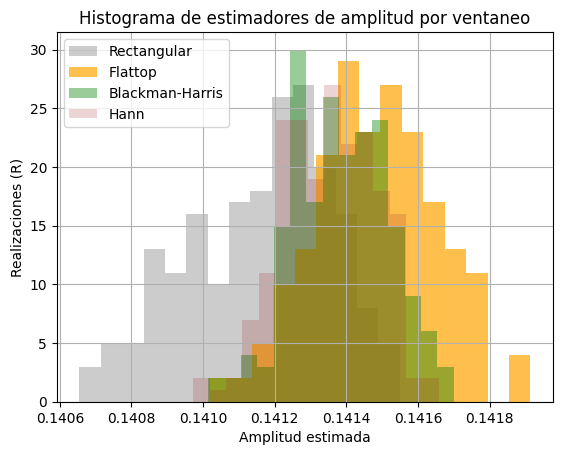

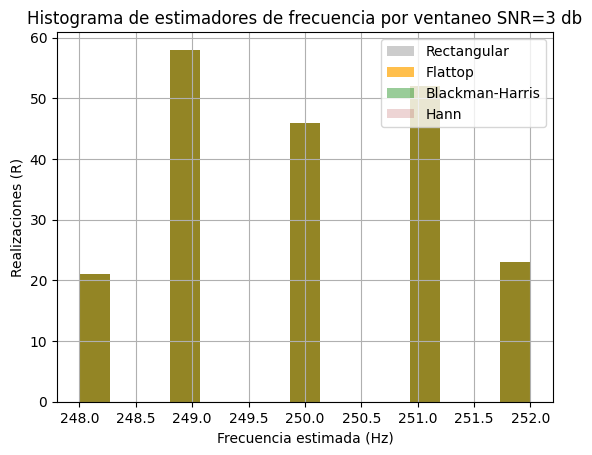

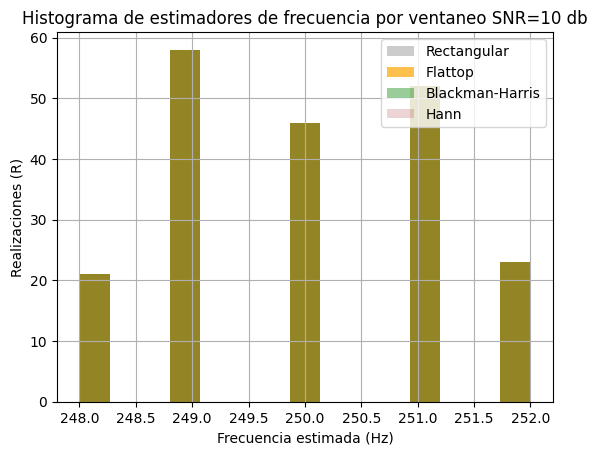

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
import scipy.signal.windows as window
import scipy.stats as st

# ------------------ Definición de funciones ------------------ #

def señal (tt, frec, amp, SNR, R, fase=0, v_medio=0):

    N = len(tt)
    s = amp*np.sin(2*np.pi*frec*tt + fase) + v_medio
    if SNR == None:
      return s

    P_signal = np.mean (s)
    P_noise  = P_signal / (10**(SNR/10))
    ruido_mat = np.random.normal (0, np.sqrt(P_noise), size=(N,R))
    return s + ruido_mat

# ------------------ Parámetros ------------------ #

fs = 1000
N = 1000
df = fs/N
R = 200
ff = np.arange(N) * df
ff_zp = fs * np.arange (10*N) / (10*N)

# ----------- Matrices de tiempo y frecuencia ----------- #

tt = np.arange(N) / fs                         # (Nx1)
tt_col = tt.reshape (N, 1)                     # (Nx1)
tt_mat = np.tile (tt_col, (1, R))              # (NxR)

frec_rand = np.random.uniform (-2, 2, R)       # (Rx1)
frec = (N/4 + frec_rand) * df                  # (Rx1) [Hz]
frec_fila = frec.reshape (1, R)                # (1,R)
frec_mat = np.tile (frec_fila, (N, 1))         # (N,R)

# --------------------- Modelo de señal (SNR en dB) --------------------- #
amp_0 = np.sqrt(2)
x1 = señal (tt = tt_mat, frec = frec_mat, amp = amp_0, SNR = 3, R = R) # (NxR)
x2 = señal (tt = tt_mat, frec = frec_mat, amp = amp_0, SNR = 10, R = R) # (NxR)

#print(f"Var ruido target={P_noise:.4f}  empírica≈{np.var(ruido_mat):.4f}")

# ------------------------- Ventaneo y FFT para x1 (SNR = 3 dB) ------------------------- #

w_rect = np.ones ((N,1))
x1_rect = x1 * w_rect
X1_rect = (1/N) * fft(x1_rect, axis=0)
X1_rect_zp = (1/(10*N)) * fft(x1_rect, n=10*N, axis=0)

w_flat = window.flattop (N, sym=False).reshape(-1,1)
x1_flat = x1 * w_flat
X1_flat = (1/N) * fft(x1_flat, axis=0)
X1_flat_zp = (1/(10*N)) * fft(x1_flat, n=10*N, axis=0)

w_bh = window.blackmanharris (N, sym=False).reshape(-1,1)
x1_bh = x1 * w_bh
X1_bh = (1/N) * fft(x1_bh, axis=0)
X1_bh_zp = (1/(10*N)) * fft(x1_bh, n=10*N, axis=0)

w_hann = window.hann (N, sym=False).reshape(-1,1)
x1_hann = x1 * w_hann
X1_hann = (1/N) * fft(x1_hann, axis=0)
X1_hann_zp = (1/(10*N)) * fft(x1_hann, n=10*N, axis=0)

# ------- Ventaneo y FFT para x2 (SNR = 10 dB) ------- #

# Rectangular
x2_rect = x2 * w_rect
X2_rect = (1/N) * fft(x2_rect, axis=0)
X2_rect_zp = (1/(10*N)) * fft(x2_rect, n=10*N, axis=0)

# Flattop
x2_flat = x2 * w_flat
X2_flat = (1/N) * fft(x2_flat, axis=0)
X2_flat_zp = (1/(10*N)) * fft(x2_flat, n=10*N, axis=0)

# Blackman–Harris
x2_bh = x2 * w_bh
X2_bh = (1/N) * fft(x2_bh, axis=0)
X2_bh_zp = (1/(10*N)) * fft(x2_bh, n=10*N, axis=0)

# Hann
x2_hann = x2 * w_hann
X2_hann = (1/N) * fft(x2_hann, axis=0)
X2_hann_zp = (1/(10*N)) * fft(x2_hann, n=10*N, axis=0)

# --------------------- Estimadores de amplitud (SNR=3 dB)--------------------- #

ax1_rect = 2*np.max(np.abs(X1_rect_zp), axis=0) / np.mean(w_rect) # la // se utiliza para forzar una división entera
sesgo_ax1_rect = np.mean(ax1_rect) - amp_0 # el sesgo es la distancia al valor verdadero del valor esperado del estimador (en este caso, la media)
var_ax1_rect = np.var(ax1_rect)

ax1_flat = 2*np.max(np.abs(X1_flat_zp), axis=0) / np.mean(w_flat)
sesgo_ax1_flat = np.mean(ax1_flat) - amp_0
var_ax1_flat = np.var(ax1_flat) # puedo utilizar un estadíst|ico robusto para estimar la varianza (muy útil en distribuciones no normales)

ax1_bh = 2*np.max(np.abs(X1_bh_zp), axis=0) / np.mean(w_bh)
sesgo_ax1_bh = np.mean(ax1_bh) - amp_0
var_ax1_bh = np.var(ax1_bh)

ax1_hann = 2*np.max(np.abs(X1_hann_zp), axis=0) / np.mean(w_hann)
sesgo_ax1_hann = np.mean(ax1_hann) - amp_0
var_ax1_hann = np.var(ax1_hann)

# --------------------- Estimadores de frecuencia --------------------- #

fx1_rect = np.argmax ((np.abs(X1_rect[0:N//2, :])), axis=0) # verificar qué sucede con zero-padding (ojo con la densidad espectral)
sesgo_fx1_rect = np.mean (fx1_rect - frec_mat[N//4, :]) # ahora mi valor de frecuencia conocido ya no está fijo, debo barrer todas las realizaciones
var_fx1_rect = st.median_abs_deviation (fx1_rect) # ???

fx1_flat = np.argmax ((np.abs(X1_flat[0:N//2, :])), axis=0)
sesgo_fx1_flat = np.mean (fx1_flat - frec_mat[N//4, :]) 
var_fx1_flat = st.median_abs_deviation (fx1_flat)

fx1_bh = np.argmax ((np.abs(X1_bh[0:N//2, :])), axis=0)
sesgo_fx1_bh = np.mean (fx1_bh - frec_mat[N//4, :]) 
var_fx1_bh = st.median_abs_deviation (fx1_bh)

fx1_hann= np.argmax ((np.abs(X1_hann[0:N//2, :])), axis=0)
sesgo_fx1_hann = np.mean (fx1_hann - frec_mat[N//4, :]) 
var_fx1_hann = st.median_abs_deviation (fx1_hann)

# --------------------- Estimadores de frecuencia (x2, SNR=10 dB) --------------------- #

fx2_rect = np.argmax((np.abs(X2_rect[0:N//2, :])), axis=0)
fx2_flat = np.argmax((np.abs(X2_flat[0:N//2, :])), axis=0)
fx2_bh   = np.argmax((np.abs(X2_bh  [0:N//2, :])), axis=0)
fx2_hann = np.argmax((np.abs(X2_hann[0:N//2, :])), axis=0)

sesgo_fx2_rect = np.mean(fx2_rect - N//4)
sesgo_fx2_flat = np.mean(fx2_flat - N//4)
sesgo_fx2_bh   = np.mean(fx2_bh   - N//4)
sesgo_fx2_hann = np.mean(fx2_hann - N//4)

var_fx2_rect = st.median_abs_deviation(fx2_rect)
var_fx2_flat = st.median_abs_deviation(fx2_flat)
var_fx2_bh   = st.median_abs_deviation(fx2_bh)
var_fx2_hann = st.median_abs_deviation(fx2_hann)


# --------------------------- Ploteos --------------------------- #

plt.figure (1)

plt.subplot (4, 1, 1)
# plt.plot (ff_zp, 10*np.log10(np.abs(X1_rect_zp)**2), linewidth=0.6, alpha=0.6) # para observar con zero-padding
plt.plot (ff, 10*np.log10(np.abs(X1_rect)**2), linewidth=0.6, alpha=0.6)
plt.title ('PSD - Ventana Rectangular')
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('[dB]')
plt.xlim (0, fs/2)
plt.grid (True)

plt.subplot (4, 1, 2)
# plt.plot (ff_zp, 10*np.log10(np.abs(X1_flat_zp)**2), linewidth=0.6, alpha=0.6) # para observar con zero-padding
plt.plot (ff, 10*np.log10(np.abs(X1_flat)**2), linewidth=0.6, alpha=0.6)
plt.title ('PSD - Ventana Flattop')
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('[dB]')
plt.xlim (0, fs/2)
plt.grid (True)

plt.subplot (4, 1, 3)
# plt.plot (ff_zp, 10*np.log10(np.abs(X1_bh_zp)**2), linewidth=0.6, alpha=0.6) # para observar con zero-padding
plt.plot (ff, 10*np.log10(np.abs(X1_bh)**2), linewidth=0.6, alpha=0.6)
plt.title ('PSD - Ventana Blackman-Harris')
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('[dB]')
plt.xlim (0, fs/2)
plt.grid (True)

plt.subplot (4, 1, 4)
# plt.plot (ff_zp, 10*np.log10(np.abs(X1_hann_zp)**2), linewidth=0.6, alpha=0.6) # para observar con zero-padding
plt.plot (ff, 10*np.log10(np.abs(X1_hann)**2), linewidth=0.6, alpha=0.6)
plt.title ('PSD - Ventana Hann')
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('[dB]')
plt.xlim (0, fs/2)
plt.grid (True)

plt.tight_layout ()
plt.show ()


plt.figure (2)

plt.hist (ax1_rect, bins=15, color='gray', alpha=0.4, label='Rectangular')
plt.hist (ax1_flat, bins=15, color='orange', alpha=0.7, label='Flattop')
plt.hist (ax1_bh, bins=15, color='green', alpha=0.4, label='Blackman-Harris')
plt.hist (ax1_hann, bins=15, color='brown', alpha=0.2, label='Hann')
plt.title ('Histograma de estimadores de amplitud por ventaneo')
plt.ylabel ('Realizaciones (R)')
plt.xlabel ('Amplitud estimada')
plt.legend ()
plt.grid (True)

plt.show ()

plt.figure (3)

plt.hist (fx1_rect, bins=15, color='gray', alpha=0.4, label='Rectangular')
plt.hist (fx1_flat, bins=15, color='orange', alpha=0.7, label='Flattop')
plt.hist (fx1_bh, bins=15, color='green', alpha=0.4, label='Blackman-Harris')
plt.hist (fx1_hann, bins=15, color='brown', alpha=0.2, label='Hann')
plt.title ('Histograma de estimadores de frecuencia por ventaneo SNR=3 db')
plt.ylabel ('Realizaciones (R)')
plt.xlabel ('Frecuencia estimada (Hz)')
plt.legend ()
plt.grid (True)

plt.show ()

plt.figure (4)

plt.hist (fx2_rect, bins=15, color='gray', alpha=0.4, label='Rectangular')
plt.hist (fx2_flat, bins=15, color='orange', alpha=0.7, label='Flattop')
plt.hist (fx2_bh, bins=15, color='green', alpha=0.4, label='Blackman-Harris')
plt.hist (fx2_hann, bins=15, color='brown', alpha=0.2, label='Hann')
plt.title ('Histograma de estimadores de frecuencia por ventaneo SNR=10 db')
plt.ylabel ('Realizaciones (R)')
plt.xlabel ('Frecuencia estimada (Hz)')
plt.legend ()
plt.grid (True)

plt.show ()

# Análisis de resultados

## Inciso a) FFT y PSD de las tres senoidales

### Qué estoy viendo y por qué pasa

**Caso \( f_0 = \tfrac{f_s}{4} \) (alineado al bin):**  
La DFT muestrea el espectro en múltiplos de:

$$
\Delta f = \frac{f_s}{N}
$$

Cuando la senoidal cumple:

$$
f_0 = k_0 \, \Delta f \quad (\delta = 0),
$$

la señal completa un número entero de ciclos dentro de la ventana rectangular de \(N\) muestras.  
El DTFT del segmento ventaneado se obtiene multiplicando en tiempo por \(w[n]\) (rectangular) y, en frecuencia, se **convoluciona** con la respuesta de esa ventana, cuyo núcleo es el **Dirichlet**:

$$
W\!\left(e^{j\omega}\right) \;=\; e^{-j\omega\frac{N-1}{2}} \cdot \frac{\sin\!\left(\tfrac{N\omega}{2}\right)}{\sin\!\left(\tfrac{\omega}{2}\right)}
$$

Entonces, para una senoidal:

$$
x[n] = \sin(\omega_0 n)\, w[n],
$$

el DTFT resulta (a grandes rasgos):

$$
X\!\left(e^{j\omega}\right) \;\propto\; W\!\left(e^{j(\omega - \omega_0)}\right) \;-\; W\!\left(e^{j(\omega + \omega_0)}\right)
$$

La DFT toma **muestras** de ese DTFT en:

$$
\omega_k = \frac{2\pi k}{N}
$$

Como \(f_0\) cae exactamente en un bin, muestreo el **máximo** del lóbulo principal y a la vez caigo en los **ceros** de los lóbulos laterales.  
Resultado: se ve **un solo pico limpio**, sin desparramo.

---

**Casos \( f_0 = \tfrac{f_s}{4} + 0.25\,\Delta f \) y \( f_0 = \tfrac{f_s}{4} + 0.5\,\Delta f \) (desintonías fraccionales):**  

Ahora:

$$
f_0 = (k_0 + \delta)\,\Delta f, 
\qquad 
\delta \neq 0
$$

El Dirichlet es el mismo, pero lo muestreo **corridito** respecto de los bins; la energía que antes quedaba en un solo bin ahora se **reparte** entre vecinos (**spectral leakage**).

- Con \(\delta = 0.25\), la energía se reparte de forma **asimétrica** alrededor del bin más cercano.  
- Con \(\delta = 0.5\), el máximo real queda **exactamente entre dos bins** y la energía se divide casi **a la mitad** en ambos.  
- Los lóbulos laterales del rectangular aparecen al nivel característico (primer lóbulo \(\approx -13\,\text{dB}\)) y decaen aproximadamente como \(\tfrac{1}{f}\).  
- Las muescas periódicas que se ven son los **ceros del Dirichlet**, ubicados cada \(\Delta f\).  

Como la señal es real, el espectro cumple:

$$
X[k] = X^{*}[N-k]
$$

por eso el gráfico es simétrico respecto de:

$$
\frac{f_s}{2}
$$

---

## Inciso b) Parseval (por qué el “área total” se mantiene aunque la forma cambie)

### Qué estoy verificando

La identidad de Parseval establece que:

$$
\frac{1}{N}\sum_{n=0}^{N-1} |x[n]|^2 
\;=\; 
\frac{1}{N^2}\sum_{k=0}^{N-1} |X[k]|^2
$$

Es decir, la **potencia promedio temporal** es igual a la **potencia total espectral** (con el escalado correcto).  
Yo normalicé las señales a varianza unitaria, así que la comparación ya viene bien dimensionada.

---

### Por qué se cumple aunque los espectros sean distintos

El leakage redistribuye energía entre bins, pero no la crea ni la destruye.  
La ventana rectangular actúa como un **filtro en frecuencia** (el Dirichlet), que **convoluciona** el espectro ideal de la senoidal (dos deltas) con su respuesta.  
Esa convolución ensancha y genera lóbulos, pero la suma total sigue siendo la misma: Parseval.

Las diferencias microscópicas que aparecen en los cálculos son del orden de:

$$
10^{-16}
$$

lo cual corresponde a la **precisión numérica** de la máquina, no a un error físico.

---

## Inciso c) Zero padding en las tres señales

### Qué cambia visualmente y por qué

Al agregar \(9N\) ceros, la longitud de la señal pasa a:

$$
N' = 10N
$$

y la resolución frecuencial mejora a:

$$
\Delta f' = \frac{f_s}{N'} = \frac{\Delta f}{10}
$$

Esto interpola el DTFT en más puntos, lo que hace que el espectro se vea más suave.

- En la señal **\(f_s/4\) exacta**, el pico sigue cayendo en un bin, pero ahora se ve **más definido** y el piso **más continuo** gracias al muestreo en frecuencia más denso.  
- En **\(f_s/4 + 0.25\,\Delta f\)** y **\(f_s/4 + 0.5\,\Delta f\)**, el **leakage** persiste (porque es propio de la ventana rectangular), pero los lóbulos laterales se ven **más claros** y se identifican bien los **ceros** del Dirichlet cada \(\Delta f'\).  
- El zero padding **no cambia** la **anchura real del lóbulo principal** (≈ \(2\,\Delta f\)); lo que cambia es que tengo **10× más puntos** sobre la misma envolvente, por eso la curva aparece **más densa y suave**.


# Conclusión

El trabajo permitió verificar de manera experimental los conceptos fundamentales del análisis espectral en señales discretas:

- La **Transformada Discreta de Fourier (DFT)** permitió observar cómo una señal periódica se representa en el dominio de la frecuencia y cómo el muestreo en múltiplos de \(\Delta f\) determina la forma de su espectro.  
- Se comprobó que, cuando la frecuencia de la senoidal coincide con un múltiplo entero de \(\Delta f\), la energía queda contenida en un único bin; mientras que en frecuencias no alineadas aparece el **leakage espectral**, redistribuyendo energía en los bins vecinos.  
- La **identidad de Parseval** se verificó con gran precisión: la potencia promedio en el tiempo coincidió con la potencia total en frecuencia, confirmando la conservación de energía independientemente de la forma del espectro.  
- La técnica de **zero padding** permitió mejorar la resolución en el dominio de la frecuencia, mostrando con más claridad los lóbulos y ceros del Dirichlet, aunque sin eliminar el leakage (ya que este depende de la ventana utilizada).  

En conclusión, los resultados obtenidos validan la teoría estudiada: la DFT describe cómo las señales se distribuyen en frecuencia, Parseval garantiza la conservación de energía, y el zero padding ofrece una mejor visualización y estimación de frecuencias sin modificar el contenido energético de la señal. Esto fortaleció el vínculo entre los conceptos matemáticos y las simulaciones prácticas en Python.

---

# Autoevaluación del aprendizaje

Durante la realización del trabajo logré afianzar varios conceptos importantes de la materia:

- Comprendí en profundidad cómo la DFT discretiza el espectro y qué significa que una frecuencia esté o no alineada con un bin.  
- Diferencié claramente entre la forma del espectro (con leakage o sin él) y la potencia total de la señal, entendiendo el rol de la identidad de Parseval.  
- Pude visualizar de manera práctica el efecto del **zero padding**: mejora la resolución frecuencial sin alterar la potencia ni la anchura real de los lóbulos.  
- Al comparar señales cercanas en frecuencia, entendí cómo incluso diferencias pequeñas respecto a \(\Delta f\) generan espectros muy distintos.  

Además, reforcé el uso de herramientas como **Jupyter Notebook, NumPy y Matplotlib** para el análisis, representación y validación numérica de resultados, lo cual me permitió interpretar mejor la teoría.  

Finalmente, utilicé **ChatGPT** como apoyo para:  
- Redactar y organizar las secciones teóricas del informe (introducción, análisis y conclusiones).  
- Aclarar dudas puntuales sobre el significado físico de los resultados obtenidos (Parseval, leakage y zero padding).  

Este proceso me permitió consolidar la teoría vista en clase con la práctica computacional, integrando el análisis matemático con simulaciones claras y visuales.
